In [ ]:
import uproot
file = uproot.open("ZH_HCC_ZLL_NanoV9_2017_867C.root")
file.classnames()

In [ ]:
tree = file["Events"]
tree.keys()

In [62]:
branches = tree.arrays()
# print(len(branches))

Masking Muons

In [ ]:
# double_muon_mask = branches["nMuon"] > 1
# print(double_muon_mask)
# print(branches["nMuon"][double_muon_mask])

# import numpy as np
# np.sum(branches["nMuon"][double_muon_mask])

pt_mask = branches["Muon_pt"] > 25
eta_mask = abs(branches["Muon_eta"]) < 2.4
# print(pt_mask)
# print(eta_mask)
pt_eta_mask = pt_mask & eta_mask
print(pt_eta_mask)

muon_mask = [sum(1 if value else 0 for value in boolean) for boolean in pt_eta_mask]
print(muon_mask)
muon_mask = [x > 1 for x in muon_mask]
print(muon_mask)

Finding the 4-Vector of Muons

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pylorentz import Momentum4

Muon1_mass = np.array([sublist[0] for sublist in branches["Muon_mass"][muon_mask]])
Muon1_eta = np.array([sublist[0] for sublist in branches["Muon_eta"][muon_mask]])
Muon1_phi = np.array([sublist[0] for sublist in branches["Muon_phi"][muon_mask]])
Muon1_pt = np.array([sublist[0] for sublist in branches["Muon_pt"][muon_mask]])

Muon2_mass = np.array([sublist[1] for sublist in branches["Muon_mass"][muon_mask]])
Muon2_eta = np.array([sublist[1] for sublist in branches["Muon_eta"][muon_mask]])
Muon2_phi = np.array([sublist[1] for sublist in branches["Muon_phi"][muon_mask]])
Muon2_pt = np.array([sublist[1] for sublist in branches["Muon_pt"][muon_mask]])

Muon1 = Momentum4.m_eta_phi_pt(Muon1_mass, Muon1_eta, Muon1_phi, Muon1_pt)
Muon2 = Momentum4.m_eta_phi_pt(Muon2_mass, Muon2_eta, Muon2_phi, Muon2_pt)

M = Muon1 + Muon2
print(M.m)
len(M.m)

Invariant Mass of Z boson

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\황시연\AppData\Local\Temp\ipykernel_25392\1968774614.py:1: SyntaxWarning: invalid escape sequence '\m'
  plt.hist(M.m, label = "Muon $p_{\mathrm{T}}$ > 25, Muon $|\eta| < 2.4$", bins = 50, range = (0, 300))


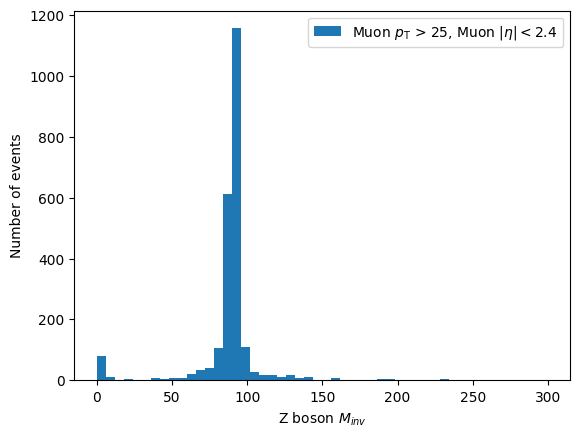

In [65]:
plt.hist(M.m, label = "Muon $p_{\mathrm{T}}$ > 25, Muon $|\eta| < 2.4$", bins = 50, range = (0, 300))
plt.xlabel("Z boson $M_{\t{inv}}$")
plt.ylabel("Number of events")
plt.legend()
plt.show()

Transverse Momentum of Z boson

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\황시연\AppData\Local\Temp\ipykernel_25392\2588408468.py:1: SyntaxWarning: invalid escape sequence '\m'
  plt.hist(M.p_t, label = "Muon $p_{\mathrm{T}}$ > 25, Muon $|\eta| < 2.4$", bins = 50, range = (-50, 700))
C:\Users\황시연\AppData\Local\Temp\ipykernel_25392\2588408468.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Z boson $p_{\mathrm{T}}$ [Gev]")


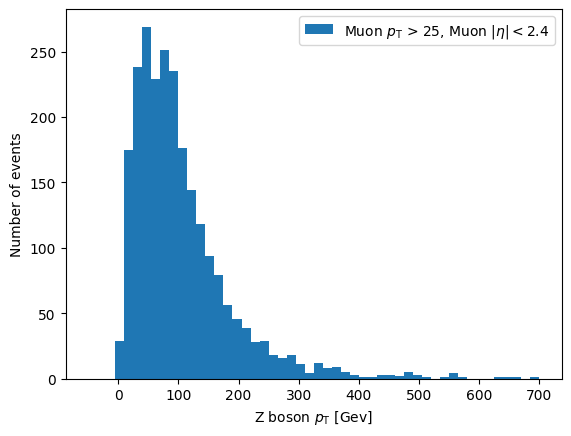

In [66]:
plt.hist(M.p_t, label = "Muon $p_{\mathrm{T}}$ > 25, Muon $|\eta| < 2.4$", bins = 50, range = (-50, 700))
plt.xlabel("Z boson $p_{\mathrm{T}}$ [Gev]")
plt.ylabel("Number of events")
plt.legend()

pt, eta, phi of Jets

<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\e'
<>:36: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\e'
<>:36: SyntaxWarning: invalid escape sequence '\p'
C:\Users\황시연\AppData\Local\Temp\ipykernel_25392\379683165.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Jet $p_{\mathrm{T}}$ [Gev]")
C:\Users\황시연\AppData\Local\Temp\ipykernel_25392\379683165.py:31: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel("Jet $\eta$ [rad]")
C:\Users\황시연\AppData\Local\Temp\ipykernel_25392\379683165.py:36: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel("Jet $\phi$ [rad]")


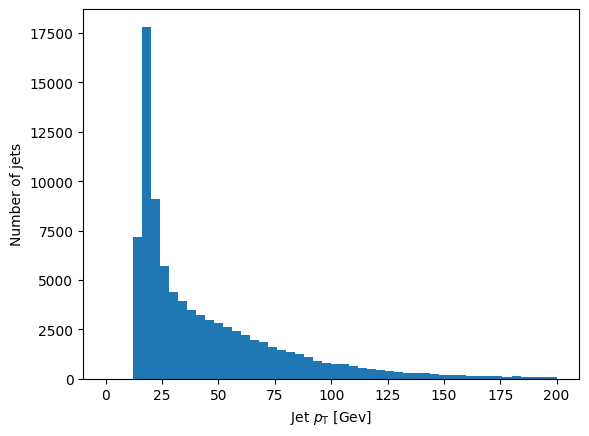

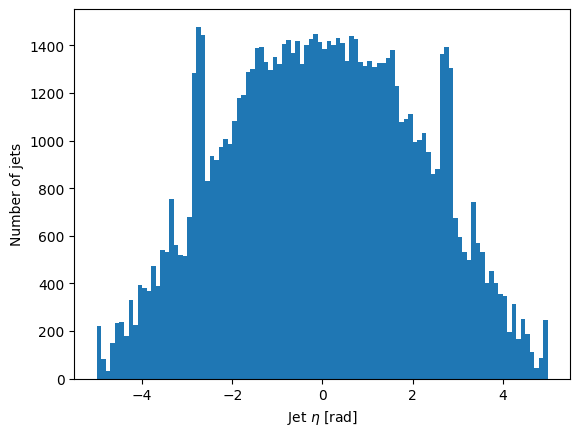

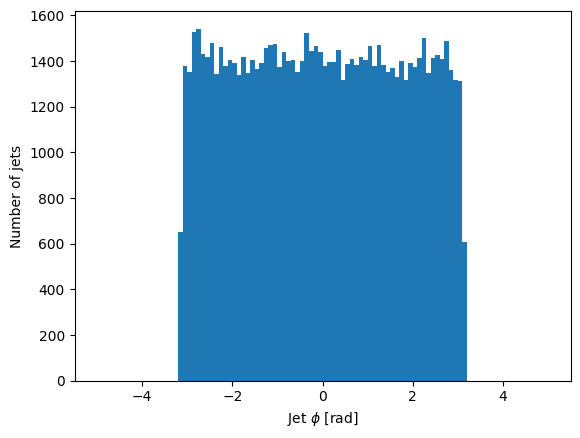

In [67]:
pt = []
eta = []
phi = []

for i in range(0, len(branches)):
    # if i < 10:
    #     print(i)
    #     print("nMuon = ", branches["nMuon"][i], len(branches["Muon_pt"][i]))
    #     print(branches["Jet_pt"][i])

    # for j in range(0, branches["nMuon"][i]):
    #     if i < 10:
    #         print(branches["Muon_pt"][i][j])

    for j in range(0, len(branches["Jet_pt"][i])):
        # if i < 10:
        pt.append(branches["Jet_pt"][i][j])

    for k in range(0, len(branches["Jet_eta"][i])):
        eta.append(branches["Jet_eta"][i][k])

    for l in range(0, len(branches["Jet_phi"][i])):
        phi.append(branches["Jet_phi"][i][l])

plt.hist(pt, bins = 50, range = (0, 200))
plt.xlabel("Jet $p_{\mathrm{T}}$ [Gev]")
plt.ylabel("Number of jets")
plt.show()

plt.hist(eta, bins = 100, range = (-5, 5))
plt.xlabel("Jet $\eta$ [rad]")
plt.ylabel("Number of jets")
plt.show()

plt.hist(phi, bins = 100, range = (-5, 5))
plt.xlabel("Jet $\phi$ [rad]")
plt.ylabel("Number of jets")
plt.show()

Masking Jets

In [ ]:
# double_jet_mask = branches["nJet"] > 1
# print(double_jet_mask)
# print(branches["nJet"][double_jet_mask])

pt_mask = branches["Jet_pt"] > 25
eta_mask = abs(branches["Jet_eta"]) < 2.4
# print(pt_mask)
# print(eta_mask)
pt_eta_mask = pt_mask & eta_mask
print(pt_eta_mask)

jet_mask = [sum(1 if value else 0 for value in boolean) for boolean in pt_eta_mask]
print(jet_mask)
jet_mask = [x > 1 for x in jet_mask]

momentum = ["Jet_mass", "Jet_eta", "Jet_phi", "Jet_pt"]

for i in momentum:
    for j in range(0, 2):
        print(f"{i}{j + 1} = ", [sublist[j] for sublist in branches[i][jet_mask and muon_mask]])

Finding the 4-Vector of Jets

In [ ]:
momentum = ["Jet_mass", "Jet_eta", "Jet_phi", "Jet_pt"]

Jet1_mass = np.array([sublist[0] for sublist in branches["Jet_mass"][jet_mask and muon_mask]])
Jet1_eta = np.array([sublist[0] for sublist in branches["Jet_eta"][jet_mask and muon_mask]])
Jet1_phi = np.array([sublist[0] for sublist in branches["Jet_phi"][jet_mask and muon_mask]])
Jet1_pt = np.array([sublist[0] for sublist in branches["Jet_pt"][jet_mask and muon_mask]])

Jet2_mass = np.array([sublist[1] for sublist in branches["Jet_mass"][jet_mask and muon_mask]])
Jet2_eta = np.array([sublist[1] for sublist in branches["Jet_eta"][jet_mask and muon_mask]])
Jet2_phi = np.array([sublist[1] for sublist in branches["Jet_phi"][jet_mask and muon_mask]])
Jet2_pt = np.array([sublist[1] for sublist in branches["Jet_pt"][jet_mask and muon_mask]])

Jet1 = Momentum4.m_eta_phi_pt(Jet1_mass, Jet1_eta, Jet1_phi, Jet1_pt)
Jet2 = Momentum4.m_eta_phi_pt(Jet2_mass, Jet2_eta, Jet2_phi, Jet2_pt)

M = Jet1 + Jet2
print(M.m)
len(M.m)

Invariant Mass of H boson

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\황시연\AppData\Local\Temp\ipykernel_25392\1492043716.py:1: SyntaxWarning: invalid escape sequence '\m'
  plt.hist(M.m, label = "Jet $p_{\mathrm{T}}$ > 25, Jet $|\eta| < 2.4$", bins = 50, range = (0, 700))


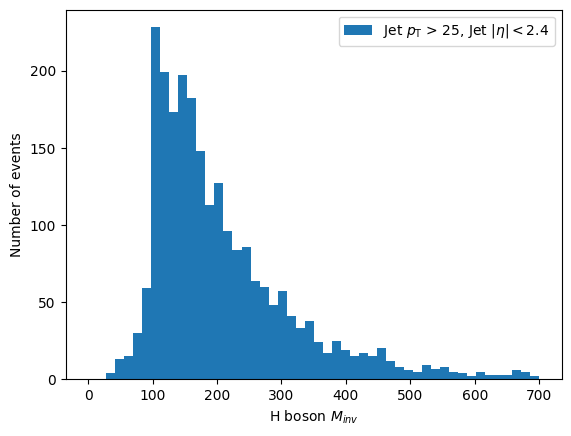

In [70]:
plt.hist(M.m, label = "Jet $p_{\mathrm{T}}$ > 25, Jet $|\eta| < 2.4$", bins = 50, range = (0, 700))
plt.xlabel("H boson $M_{\t{inv}}$")
plt.ylabel("Number of events")
plt.legend()
plt.show()

Transverse Momentum of H boson

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\황시연\AppData\Local\Temp\ipykernel_25392\1745392326.py:1: SyntaxWarning: invalid escape sequence '\m'
  plt.hist(M.p_t, label = "Jet $p_{\mathrm{T}}$ > 25, Jet $|\eta| < 2.4$", bins = 50, range = (0, 500))
C:\Users\황시연\AppData\Local\Temp\ipykernel_25392\1745392326.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("H boson $p_{\mathrm{T}}$ [Gev]")


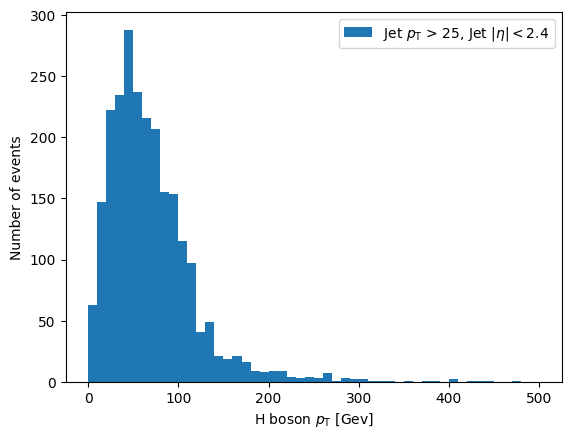

In [71]:
plt.hist(M.p_t, label = "Jet $p_{\mathrm{T}}$ > 25, Jet $|\eta| < 2.4$", bins = 50, range = (0, 500))
plt.xlabel("H boson $p_{\mathrm{T}}$ [Gev]")
plt.ylabel("Number of events")
plt.legend()